##Prática com o KNN - N nearest Neighbors

In [125]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import itertools

In [126]:
#carregando a base de dados de dígitos escritos à mão, fornecida pelo sklearn

digits = datasets.load_digits()

In [127]:
#data dictionary da base de dados
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [128]:
#matrizes contendo as imagens de cada dígito
digits.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

In [129]:
#classes/target
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<b>Exibindo imagens rotuladas da base de treino</b>

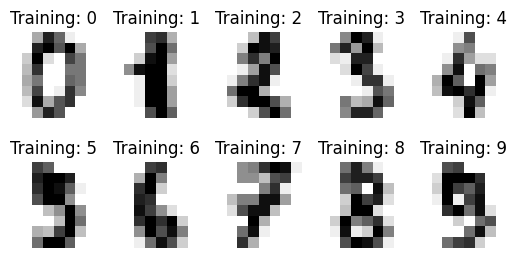

In [130]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(3, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

In [131]:
#atribuindo os dados à um dataframe do pandas

n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
classe = digits.target

dataset = pd.DataFrame(data)
dataset['classe'] = classe

In [132]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,classe
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [153]:
#separando os dados em treino e teste

X_train, X_test, y_train, y_test = train_test_split(dataset.drop('classe', axis=1), dataset['classe'], test_size=0.3, random_state=42)

In [154]:
#verificando o tamanho dos dados de treino e teste
X_train.shape, X_test.shape

((1257, 64), (540, 64))

In [155]:
y_train.shape, y_test.shape

((1257,), (540,))

In [156]:
#instanciando o KNN

knn = KNeighborsClassifier(n_neighbors=3)

In [157]:
#treinando o algoritmo
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [158]:
#predizendo os dados de teste
y_pred = knn.predict(X_test)

In [159]:
#avaliando resultados
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.98      1.00      0.99        50
           2       1.00      1.00      1.00        47
           3       0.98      1.00      0.99        54
           4       0.98      1.00      0.99        60
           5       0.99      1.00      0.99        66
           6       1.00      1.00      1.00        53
           7       1.00      0.98      0.99        55
           8       0.98      0.98      0.98        43
           9       0.98      0.93      0.96        59

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



## Matriz de Confusão

In [160]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Classe Real')
    plt.xlabel('Classe Predita')

Confusion matrix, without normalization
[[53  0  0  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 54  0  0  0  0  0  0]
 [ 0  0  0  0 60  0  0  0  0  0]
 [ 0  0  0  0  0 66  0  0  0  0]
 [ 0  0  0  0  0  0 53  0  0  0]
 [ 0  0  0  0  0  0  0 54  0  1]
 [ 0  1  0  0  0  0  0  0 42  0]
 [ 0  0  0  1  1  1  0  0  1 55]]


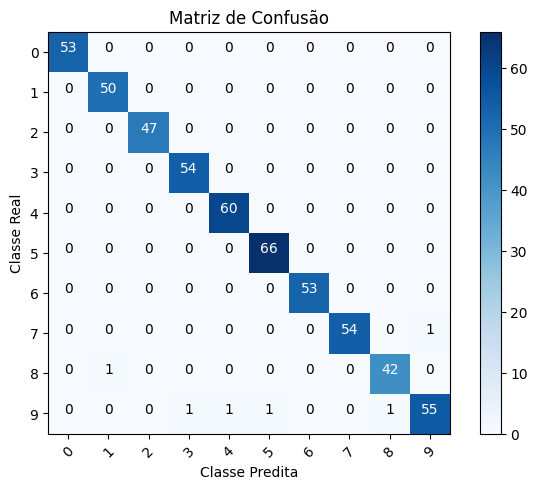

In [161]:
classe_names = digits.target_names

cnf_matrix = confusion_matrix(y_test, y_pred)


plt.figure()
plot_confusion_matrix(cnf_matrix, classes=classe_names, title='Matriz de Confusão')
plt.show()

## Validação Cruzada

In [162]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn, dataset.drop('classe', axis=1), dataset['classe'], cv=5)
scores

array([0.95555556, 0.95833333, 0.96657382, 0.98607242, 0.96657382])

## É possível melhorar o desempenho otimizando o parâmetro K?

In [163]:
from sklearn.model_selection import GridSearchCV

In [166]:
k_list = list(range(1, 31))

k_values = dict(n_neighbors=k_list)
print(k_values)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [167]:
#instanciando o grid

grid = GridSearchCV(knn, k_values, cv=5, scoring='accuracy')

In [169]:
#treinando
#não se faz necessário separar os dados em treino e teste, pois o grid já faz isso, por isso passamos o dataset inteiro

grid.fit(dataset.drop('classe', axis=1), dataset['classe'])

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

In [178]:
grid.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [180]:
for i in ['mean_test_score', 'std_test_score', 'param_n_neighbors']:
    print(i," : ",grid.cv_results_[i])

mean_test_score  :  [0.96439338 0.96717115 0.96662179 0.96384092 0.96272826 0.95938564
 0.95994584 0.95772052 0.95661096 0.95494274 0.9554983  0.95605231
 0.95549675 0.95605076 0.95438254 0.95438409 0.95326679 0.94937481
 0.95048437 0.94937326 0.94881925 0.94937635 0.9482637  0.94882389
 0.94548128 0.94548282 0.94380997 0.94324977 0.94102755 0.94102445]
std_test_score  :  [0.01183842 0.00618072 0.01067232 0.01094553 0.01116854 0.01061202
 0.01505909 0.01461989 0.01688705 0.01677273 0.01559219 0.01482341
 0.01579353 0.01328726 0.01452912 0.01441218 0.01099427 0.01350204
 0.01256786 0.01450101 0.0151414  0.01676341 0.01534136 0.01818901
 0.0147188  0.01502449 0.01267096 0.01029015 0.01254531 0.01179861]
param_n_neighbors  :  [1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 30]


In [181]:
print(f"O melhor valor de k é {grid.best_params_['n_neighbors']} com uma acurácia de {grid.best_score_}")

O melhor valor de k é 2 com uma acurácia de 0.9671711544413494


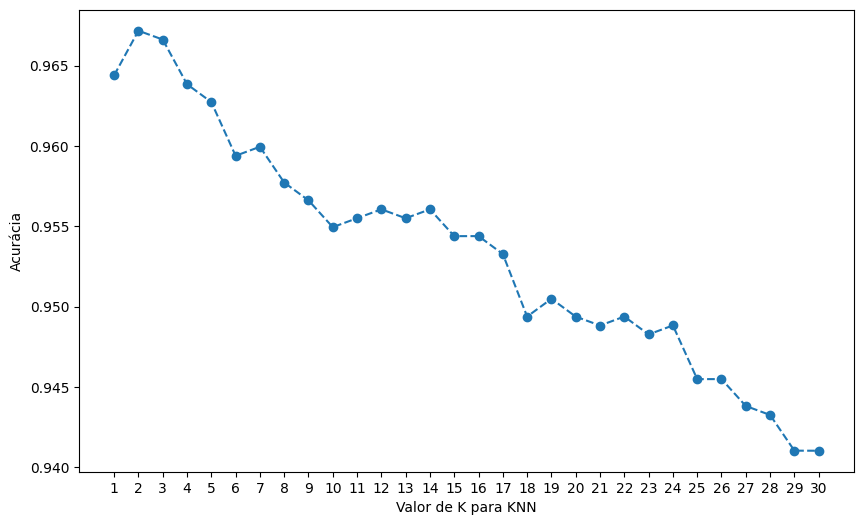

In [198]:
#plotando os resultados
scores = grid.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(k_list, scores, linestyle='dashed', marker='o')
plt.xlabel('Valor de K para KNN')
plt.ylabel('Acurácia')
plt.xticks(k_list)
plt.show()